In [123]:
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from functools import partial
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder

In [124]:
#尋找資料，定義資料型態
data = pd.read_csv('shill.csv',header = None)
data.columns = {'Record_ID':int,
               'Auction_ID':int,
               'Bidder_ID':'category',
               'Bidder_Tendency':int,
               'Bidding_Ratio':int,
               'Success_Outbidding':int,
               'Last_Bidding':int,
               'Auction_Bids':int,
               'Starting_Price_Average':int,
               'Early_Bidding':int,
               'Winning_Ratio':int,
               'Aution_Duration':int,
               'Class': int}
data.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Success_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Aution_Duration,Class
0,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
1,1,732,_***i,0.2,0.4,0,0.0000277778,0,0.993592814,0.0000277778,0.666666667,5,0
2,2,732,g***r,0.024390244,0.2,0,0.0131226852,0,0.993592814,0.0131226852,0.944444444,5,0
3,3,732,t***p,0.142857143,0.2,0,0.0030416667,0,0.993592814,0.0030416667,1,5,0
4,4,732,7***n,0.1,0.2,0,0.0974768519,0,0.993592814,0.0974768519,1,5,0


In [125]:
#LabelEncoder更改資料型態
le=LabelEncoder()
for col in data[['Record_ID','Auction_ID', 'Bidder_ID', 'Bidder_Tendency', 'Bidding_Ratio', 'Success_Outbidding', 'Last_Bidding', 'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio', 'Aution_Duration', 'Class']]:
    data[col]=le.fit_transform(data[col])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6322 entries, 0 to 6321
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Record_ID               6322 non-null   int64
 1   Auction_ID              6322 non-null   int64
 2   Bidder_ID               6322 non-null   int64
 3   Bidder_Tendency         6322 non-null   int64
 4   Bidding_Ratio           6322 non-null   int64
 5   Success_Outbidding      6322 non-null   int64
 6   Last_Bidding            6322 non-null   int64
 7   Auction_Bids            6322 non-null   int64
 8   Starting_Price_Average  6322 non-null   int64
 9   Early_Bidding           6322 non-null   int64
 10  Winning_Ratio           6322 non-null   int64
 11  Aution_Duration         6322 non-null   int64
 12  Class                   6322 non-null   int64
dtypes: int64(13)
memory usage: 642.2 KB


In [126]:
#轉化 onehot_encoding
data.replace(" ?", np.nan, inplace= True)
new_data = data.dropna()
print(r'總比數紀錄:{}'.format(data.shape[0]))
print(r'刪除含缺漏紀錄資料後比數:{}'.format(data.dropna().shape[0]))

pd.get_dummies(new_data['Record_ID'])
Record_ID_encoding = pd.get_dummies(new_data['Record_ID'], prefix= 'Record_ID')
#new_data = new_data.drop('Record_ID', 1)

pd.get_dummies(new_data['Auction_ID'])
Auction_ID_encoding = pd.get_dummies(new_data['Auction_ID'], prefix= 'Auction_ID')
#new_data = new_data.drop('Auction_ID', 1)

pd.get_dummies(new_data['Bidder_ID'])
Bidder_ID_encoding = pd.get_dummies(new_data['Bidder_ID'], prefix= 'Bidder_ID')
#new_data = new_data.drop('Bidder_ID', 1)

pd.get_dummies(new_data['Bidder_Tendency'])
Bidder_Tendency_encoding = pd.get_dummies(new_data['Bidder_Tendency'], prefix= 'Bidder_Tendency')
#new_data = new_data.drop('Bidder_Tendency', 1)

pd.get_dummies(new_data['Bidding_Ratio'])
Bidding_Ratio_encoding = pd.get_dummies(new_data['Bidding_Ratio'], prefix= 'Bidding_Ratio')
#new_data = new_data.drop('Bidding_Ratio', 1)

pd.get_dummies(new_data['Success_Outbidding'])
Success_Outbidding_encoding = pd.get_dummies(new_data['Success_Outbidding'], prefix= 'Success_Outbidding')
#new_data = new_data.drop('Success_Outbidding', 1)

pd.get_dummies(new_data['Last_Bidding'])
Last_Bidding_encoding = pd.get_dummies(new_data['Last_Bidding'], prefix= 'Last_Bidding')
#new_data = new_data.drop('Last_Bidding', 1)

pd.get_dummies(new_data['Auction_Bids'])
Auction_Bids_encoding = pd.get_dummies(new_data['Auction_Bids'], prefix= 'Auction_Bids')
#new_data = new_data.drop('Auction_Bids', 1)

pd.get_dummies(new_data['Starting_Price_Average'])
Starting_Price_Average_encoding = pd.get_dummies(new_data['Starting_Price_Average'], prefix= 'Starting_Price_Average')
new_data = new_data.drop('Starting_Price_Average', 1)

pd.get_dummies(new_data['Early_Bidding'])
Early_Bidding_encoding = pd.get_dummies(new_data['Early_Bidding'], prefix= 'Early_Bidding')
#new_data = new_data.drop('Early_Bidding', 1)

pd.get_dummies(new_data['Winning_Ratio'])
Winning_Ratio_encoding = pd.get_dummies(new_data['Winning_Ratio'], prefix= 'Winning_Ratio')
#new_data = new_data.drop('Winning_Ratio', 1)

pd.get_dummies(new_data['Aution_Duration'])
Aution_Duration_encoding = pd.get_dummies(new_data['Aution_Duration'], prefix= 'Aution_Duration')
#new_data = new_data.drop('Aution_Duration', 1)

#class_mapping = {' 1': 1, ' 0': 0}
#new_data['Class'] = new_data['Class'].map(class_mapping)

pd.get_dummies(new_data['Class'])
Class_encoding = pd.get_dummies(new_data['Class'], prefix= 'Class')
#new_data = new_data.drop('Class', 1)

pd.DataFrame(new_data)

總比數紀錄:6322
刪除含缺漏紀錄資料後比數:6322


,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Success_Outbidding,Last_Bidding,Auction_Bids,Early_Bidding,Winning_Ratio,Aution_Duration,Class
0,6321,807,290,489,400,3,5807,49,5690,72,5,2
1,0,721,303,320,317,0,34,0,36,12,3,0
2,2591,721,514,61,216,0,717,0,800,66,3,0
3,3034,721,909,279,216,0,407,0,454,71,3,0
4,3493,721,234,225,216,0,1434,0,1553,71,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6317,2353,731,666,381,187,2,3695,7,3560,51,2,1
6318,2354,502,879,83,159,0,534,5,14,46,4,0
6319,2355,502,548,149,57,0,768,5,848,0,4,0
6320,2356,502,424,192,118,0,1284,5,186,0,4,0


In [127]:
#正規化
data2 = preprocessing.normalize(new_data, norm= 'l2')
scaler = MinMaxScaler()
data3 = scaler.fit(new_data)
data3 = scaler.transform(new_data)

In [128]:
x= new_data.drop(['Class'], axis = 1)
x_norm = preprocessing.normalize(x, norm= 'l2')
y = new_data['Class']

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)
x_train.shape

(4425, 11)

In [134]:
dtree = DecisionTreeClassifier(criterion="gini")
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [135]:
#預測 y_test
y_test_predicted = dtree.predict(x_test)
#結果
accuracy = metrics.accuracy_score(y_test, y_test_predicted)
print(accuracy)

0.9978914074855034


score_array [0.9703954802259886, 0.9703954802259886, 0.9814689265536723, 0.9938983050847457, 0.9966101694915255, 0.9988700564971752, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 
score_array_MAX: 1.0
----------------------------------------------------------------------------------------------------------
score_array_test [0.977859778597786, 0.977859778597786, 0.9810226673695308, 0.992619926199262, 0.9936742224565103, 0.9968371112282551, 0.9957828149710068, 0.9968371112282551, 0.9973642593568793, 0.9968371112282551, 0.9968371112282551, 0.9968371112282551, 0.996309963099631, 0.9973642593568793, 0.9968371112282551, 0.996309963099631, 0.996309963099631, 0.9968371112282551, 0.9973642593568793]
 
score_array_test_MAX: 0.9973642593568793


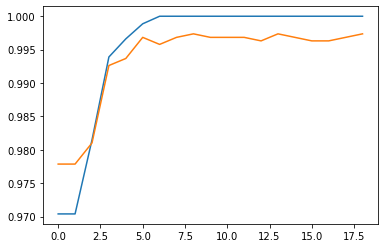

In [139]:
score_array= []
score_array_test= []

for i in range(1,20):
    dtree = DecisionTreeClassifier(criterion="entropy", max_depth= i)
    dtree.fit(x_train, y_train)
    score_val = dtree.score(x_train, y_train)
    score_test = dtree.score(x_test, y_test)
    score_array.append(score_val)
    score_array_test.append(score_test)

print("score_array",score_array)
print(" ")
print("score_array_MAX:", np.max(score_array))
print("----------------------------------------------------------------------------------------------------------")
print("score_array_test", score_array_test)
print(" ")
print("score_array_test_MAX:", np.max(score_array_test))
plt.plot(score_array)
plt.plot(score_array_test)